# Clean extracted columns
In this notebook, I'll continue to clean the extracted columns from Name and get other information from these columns.

## Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_colwidth',-1)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Load in data from part 00

In [2]:
data = pd.read_csv('00out')
data.head()

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,Location,Location Info,Island,Website,Contact,Phone,Email,col1,col2,col3,col4,col5,col6,col7,col8,col9
0,Waialua Farmers' Market,NaN,NaN,NaN,NaN,NaN,NaN,X,8:30 AM to 12:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,info@sugarmillhawaii.com,Waialua Sugar Mill,8:30 AM to 12:00 Noon,Edith Ramiscal,Email: info@sugarmillhawaii.com,NaN,NaN,NaN,NaN,NaN
1,Kekaha Neighborhood Center (Sunshine Markets),NaN,NaN,NaN,NaN,NaN,NaN,X,9:00 AM,NaN,NaN,NaN,NaN,NaN,(808) 742-1834,NaN,"Elepaio Road, Kekaha",9 AM,"Cora Asuncion, Phone: (808) 742-1834",NaN,NaN,NaN,NaN,NaN,NaN
2,Hali'imaile Farmers' Market,NaN,NaN,NaN,NaN,NaN,X,NaN,1:00 PM to 6:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hali'imaile Town Center (in a former Maui Pineapple Co. parking lot next to Hali'imaile General Store),1:00 PM - 6:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mahiku Farmers' Market,NaN,NaN,NaN,NaN,X,NaN,NaN,4:00 PM to 8:00 PM,NaN,NaN,NaN,www.mahikufarmersmarket.com,NaN,(808) 225-4002,sonnydoung@hotmail.com,International Market Place-Waikiki (near the Food Court),4:00 PM - 8:00 PM www.mahikufarmersmarket.com,Contact: Sonny Doung Phone: (808) 225-4002,Email: sonnydoung@hotmail.com,NaN,NaN,NaN,NaN,NaN
4,Country Market & Craft Fair at Waimanalo Homestead Community Center,X,NaN,NaN,NaN,NaN,NaN,NaN,9:00 AM to 4:00 PM,"1330 Kalanianaole Hwy., HI",Waimanalo Homestead Community Center,Oahu,NaN,Paul Richard,"(808) 259-8611, (808) 284-2575",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


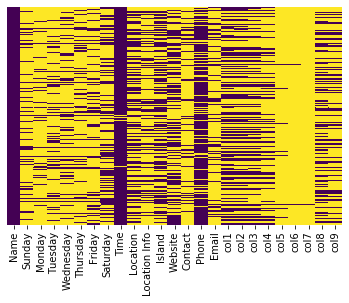

In [3]:
sns.heatmap(data.isna(), cmap='viridis', cbar=False, yticklabels=False)

## Clean up extracted columns: col1 - col7
In previous part, we already extracted patterns of Time, Website, Phone, and Email. The generated columns may also contain these patterns, but we don't need to extract them another time. However, to make it easier to get other information, it's necessary to remove these patterns from these columns.<br>
The process is:
1. Check which columns have a certain pattern
2. Check if any row has more information than just the pattern
3. Replace the pattern with blanks

### Time

In [4]:
#Check which columns have the time pattern:
print('Columns that have time information:')
for col in data:
    if (data[col].str.contains('\d{1,2}(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon)'\
                               '(?:\s{1,}?(?:to|-)\s{1,})?(?:\d{1,2}'     \
                               '(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon))?', na=False)).any() == True:
        print(col + ': ' + str(data[col].str.count(
                               '\d{1,2}(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon)'\
                               '(?:\s{1,}?(?:to|-)\s{1,})?(?:\d{1,2}'     \
                               '(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon))?').sum()))

Columns that have time information:
Time: 220.0
col1: 1.0
col2: 84.0
col3: 14.0
col4: 1.0


In [5]:
#Print out unique values for these columns to see if they have other information:
for col in data[['col1','col2','col3','col4']]:
    print(data[data[col].str.contains(
          '\d{1,2}(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon)'\
          '(?:\s{1,}?(?:to|-)\s{1,})?(?:\d{1,2}'     \
          '(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon))?',na=False)][col].unique())

['2nd Saturday of the month from 9:00 AM to 1:00 PM']
['8:30 AM to 12:00 Noon' '9 AM' '1:00 PM - 6:00 PM'
 '4:00 PM - 8:00 PM  www.mahikufarmersmarket.com' '7:30 AM to 3:00 PM'
 '11:00 AM to 11:45 AM' '11:15 AM to 12:00 Noon' '7:30 AM to 1:00 PM'
 '7:00 AM to 4:00 PM' '12:30 PM to 5:30 PM' '8:00 AM to 5:00 PM'
 '10:15 AM to 11:00 AM' '2:00 PM to 5:00 PM' '4:00 PM to 8:00 PM'
 '7:00 AM to 11:00 AM' '5:00 PM to 7:30 PM' '7:00 AM to 8:00 AM'
 '4:00 PM to 7:00 PM' '3:00 PM to 8:00 PM' '10:00 AM to 11:00 AM'
 '10:00 AM to 2:00 PM' '9:00 AM to 1:00 PM' '7:00 AM to 12:00 NOON'
 '4:30 PM' '8:00 AM to 4.00 PM' '9:00 AM to 10:00 AM' '2 PM'
 '10:45 AM to 11:45 AM' '11:45 AM to 12:30 PM' '7:00 AM to 1:00 PM'
 '7:15 AM to 8:15 AM' '7:30 AM to 2:00 PM' '3 PM' '11:30 AM to 12:30 PM'
 '4:30 PM to 7:30 PM' '8:00 AM to 12 NOON' '7:00 AM to 5:00 PM'
 'Every Wednesday 10AM - 1PM' '7:00 AM to 3:00 PM'
 '9:00AM to 1:00PM Every Sunday' '8:15 AM to 9:15 AM'
 '10:00 AM to 1:00 PM' '7:00 AM to 8:30 AM' '3:00 PM

We have website, location, and schedule information in some rows. Among them, I want to keep 'Friday: 4:30 PM - 8:00 PM; Saturday: 9:00 AM - 2:00 PM' value in col3. Other than that, we can replace time patterns with blanks.

In [6]:
#Replace time patterns with blanks:
for col in data[['col2','col3','col4']]:
    data[col] = np.where(~data[col].str.contains(r'Friday', na=False) & \
                         data[col].str.contains('\d{1,2}(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon)'\
                                                '(?:\s{1,}?(?:to|-)\s{1,})?(?:\d{1,2}'     \
                                                '(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon))?',na=False),
                         data[col].str.replace('\d{1,2}(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon)'\
                                               '(?:\s{1,}?(?:to|-)\s{1,})?(?:\d{1,2}'     \
                                               '(?:\W\d{2})?\s?(?:AM|PM|NOON|Noon))?',''),
                         data[col])

### Website

In [7]:
#Check which columns have the website pattern:
print('Columns that have website information:')
for col in data:
    if (data[col].str.contains("(?:(?:(?:https?://)?(?:www.))|(?:(?:https?://)(?:www.)?))" \
                               "[\w\-.~:/?#\[\]@!$&'()*+,;=%]+", na=False)).any() == True:
        print(col + ': ' + str(data[col].str.count(
                               "(?:(?:(?:https?://)?(?:www.))|(?:(?:https?://)(?:www.)?))" \
                               "[\w\-.~:/?#\[\]@!$&'()*+,;=%]+").sum()))

Columns that have website information:
Website: 102.0
col2: 1.0
col3: 1.0
col4: 40.0
col5: 5.0
col7: 1.0


In [8]:
#Print out unique values from these columns:
for col in data[['col2','col3','col4','col5','col7']]:
    print(data[data[col].str.contains("(?:(?:(?:https?://)?(?:www.))|(?:(?:https?://)(?:www.)?))" \
                                      "[\w\-.~:/?#\[\]@!$&'()*+,;=%]+",na=False)][col].unique())

['  www.mahikufarmersmarket.com']
['www.windwardmall.com/event/farmers-market-every-Wednesday']
['www.co.honolulu.hi.us/parks/programs/pom'
 'Email: sonnydoung@hotmail.com  www.mahikufarmersmarket.com'
 'www.hfbf.org' 'www.wardcenters.com' 'http://www.hfbf.org'
 'www.haleiwafarmersmarket.com'
 'Email:  sonnydoung@hotmail.com  www.mahikufarmersmarket.com'
 'Agent Juanita Kawamoto, Farm Fresh Hawaii; www.farmfreshhawaii.com'
 'www.hilofarmersmarket.com' 'www.skgm.org'
 'www.northshorecountrymarket.com'
 'www.local-farmers-markets.com/market/1162/honolulu/fort-street-near-wilcox-park'
 'www.kings-village.com']
['www.makekeomaunalua.com' 'www.halehalawai.org/market.htm'
 'www.waianaefarmersmarket.org' 'www.KakaakoMakaiMarket.com'
 'www.sunsetcountrymarket.org']
['www.facebook.com/#!/pages/WAIANAE-FARMERS-MARKET/234161083106']


We can replace the pattern with blanks for these columns.

In [9]:
#Replace time patterns with blanks:
for col in data[['col2','col3','col4','col5','col7']]:
    data[col] = np.where(data[col].str.contains(
                         "(?:(?:(?:https?://)?(?:www.))|(?:(?:https?://)(?:www.)?))" \
                         "[\w\-.~:/?#\[\]@!$&'()*+,;=%]+",na=False),
                         data[col].str.replace(
                         "(?:(?:(?:https?://)?(?:www.))|(?:(?:https?://)(?:www.)?))" \
                         "[\w\-.~:/?#\[\]@!$&'()*+,;=%]+",''),
                         data[col])

### Email

In [10]:
#Check which columns have the website pattern:
print('Columns that have email information:')
for col in data:
    if (data[col].str.contains('[\w\.-]+@[\w\.-]+')).any() == True:
        print(col + ': ' + str(data[col].str.count(
                               '[\w\.-]+@[\w\.-]+').sum()))

Columns that have email information:
Email: 49.0
col3: 4.0
col4: 14.0
col5: 2.0
col6: 2.0


In [11]:
#Print out unique values from these columns:
for col in data[['col3','col4','col5','col6']]:
    print(data[data[col].str.contains('[\w\.-]+@[\w\.-]+',na=False)][col].unique())

['Phone: (808) 388-9696 email: haleiwafarmersmarket@gmail.com'
 'Contact: George Lee (808) 735-4550 or georgelee2468@gmail.com'
 'Nancy: (808) 322-3118, (808) 322-2362, nkona@hawaii.rr.com'
 'Melissa McFerrin at kcfb@hawaiiantel.net; Phone: (808) 337-9944']
['Email: info@sugarmillhawaii.com' 'Email: sonnydoung@hotmail.com'
 'keala.ching@outrigger.com' 'Email: sonnydoung@hotmail.com  '
 'Email:  sonnydoung@hotmail.com  ' 'wfpinfo@isleconcierge.com'
 'Email: bethflo@hotmail.com' 'dpcinfo@isleconcierge.com'
 'Email: kekahuna@localnet.com' 'dewell@hawaii.rr.com'
 'Email: bifb@hawaiiantel.net']
['Email: nuuanumarket@gmail.com' 'Email: gagner001@hawaii.rr.com']
['Email: sonnydoung@hotmail.com' 'Email:  waianaefarmersmarket@wcchc.com']


In [12]:
#Replace time patterns with blanks:
for col in data[['col3','col4','col5','col6']]:
    data[col] = np.where(data[col].str.contains('[\w\.-]+@[\w\.-]+',na=False),
                         data[col].str.replace('[\w\.-]+@[\w\.-]+',''),
                         data[col])

### Phone

In [13]:
#Check which columns have the website pattern:
print('Columns that have phone information:')
for col in data:
    if (data[col].str.contains('\(?\d{3}\)?\W?\d{3}\W\d{4}')).any() == True:
        print(col + ': ' + str(data[col].str.count(
                               '\(?\d{3}\)?\W?\d{3}\W\d{4}').sum()))

Columns that have phone information:
Phone: 187.0
col2: 1.0
col3: 74.0
col4: 11.0
col5: 2.0


In [14]:
#Print out unique values from these columns:
for col in data[['col2','col3','col4','col5']]:
    print(data[data[col].str.contains('\(?\d{3}\)?\W?\d{3}\W\d{4}',na=False)][col].unique())

['Jan:  Phone: (808) 968-8631']
['Cora Asuncion, Phone: (808) 742-1834'
 'Contact: Sonny Doung     Phone: (808) 225-4002' 'Phone: (808) 396-0766'
 'Phone: (808) 522-7088' 'Ms. Cynda Hearn (808) 871-1307'
 'Kumu Keala Ching: (808) 324-2540' 'Jerry:  Phone: (808) 959-0488'
 'Phone: (808) 887-0023' 'Contact Sonny Doung   Phone: (808) 225-4002'
 'Phone: (808) 847-0494 Cell: (808) 554-4667' 'Phone: (808) 848-2074'
 'Phone: (808) 388-9696 email: ' 'Ben Ferris, Phone: (808) 822-1712'
 'Contact: (808) 875-0949'
 'Contact:  Sonny Doung    Phone: (808) 225-4002'
 'Cora Asuncion, Phone (808) 742-1834'
 'Contact: George Lee (808) 735-4550 or '
 'Nancy: (808) 322-3118, (808) 322-2362, ' 'Phone: (808) 966-4853'
 'Phone: (808) 537-5158' 'Branch Harmony, Phone: (808) 322-0718'
 'Keith: Phone: (808) 933-1000' 'Beth Fulton: (808) 443-1679'
 'Phone: (808) 697-3599 or 692-8200 ext. 2267' 'Phone: (808) 545-4477'
 'Vinton:  Phone: (808) 965-9205'
 'Stephanie Struble,  Phone (808) 826-1011'
 'Phone: (808) 96

There are contact names in these rows. Before replace phone pattern, we should try to extract contact information first.

#### Contact
I would like to gather the data that have phone pattern in one column. Let's pick one of the existing column.<br>
Among col2, col3, col4, and col5, col5 will have the most missing values. We can pick this one.

In [15]:
#Check how many missing rows in col5:
data['col5'].isna().sum()

213

In [16]:
#Check unique values in col5:
data['col5'].unique()

array([nan, 'Contact: Sonny Doung     Phone: (808) 225-4002',
       'Tong Sang, Phone: (808) 259-7602', '', 'Email: '], dtype=object)

In rows that have phone pattern, there's also contact information.<br>
We have blank rows here. Before moving data with phone pattern, we should replace blank data with Nan.

In [17]:
data.replace('^\s*$', np.nan, regex=True, inplace = True)

Since we will loop over these columns, it's important to see if there's any overlapped patterns among them.

In [18]:
print('These two columns have phone pattern in same rows:')
for (col1,col2) in zip(data[['col2','col2','col2','col3','col3','col4']],
                       data[['col3','col4','col5','col4','col5','col5']]):
    print(col1 + ' and ' + col2 + ': ' +
          str((data[col1].str.contains('\(?\d{3}\)?\W?\d{3}\W\d{4}', na=False) &
               data[col2].str.contains('\(?\d{3}\)?\W?\d{3}\W\d{4}', na=False)).any()))

These two columns have phone pattern in same rows:
col2 and col3: False
col2 and col4: False
col2 and col5: False
col3 and col4: False
col3 and col5: False
col4 and col5: True


We have col4 and col5 have phone pattern in same rows.

In [19]:
data[data['col4'].str.contains('\(?\d{3}\)?\W?\d{3}\W\d{4}', na=False) &
     data['col5'].str.contains('\(?\d{3}\)?\W?\d{3}\W\d{4}', na=False)][['col4','col5']]

,col4,col5
83,", Phone: (808) 259-8611, Cell: (808) 284-2575","Tong Sang, Phone: (808) 259-7602"


col5 has contact information, so we will use col5 data.<br>
Now we can move data that contain phone pattern from col2, col3, and col4 to col5.

In [20]:
for col in data[['col2','col3','col4']]:
    data['col5'] = np.where(~data['col5'].str.contains('\(?\d{3}\)?\W?\d{3}\W\d{4}',na=False) &
                             data[col].str.contains('\(?\d{3}\)?\W?\d{3}\W\d{4}',na=False),
                             data[col], data['col5'])

Let's check pattern of these values.

In [21]:
data['col5'].unique()

array([nan, 'Cora Asuncion, Phone: (808) 742-1834',
       'Contact: Sonny Doung     Phone: (808) 225-4002',
       'Phone: (808) 396-0766', 'Phone: (808) 522-7088',
       'Ms. Cynda Hearn (808) 871-1307',
       'Kumu Keala Ching: (808) 324-2540', 'Jan:  Phone: (808) 968-8631',
       'Jerry:  Phone: (808) 959-0488', 'Phone: (808) 887-0023',
       'Contact Sonny Doung   Phone: (808) 225-4002',
       'Phone: (808) 847-0494 Cell: (808) 554-4667',
       'Phone: (808) 848-2074', 'Phone: (808) 388-9696 email: ',
       'Ben Ferris, Phone: (808) 822-1712', 'Contact: (808) 875-0949',
       'Beth:  Phone: (808) 328-8547', 'Pepito Valdez  (808) 298-4289',
       'Tong Sang, Phone: (808) 259-7602',
       'Contact:  Sonny Doung    Phone: (808) 225-4002',
       'Cora Asuncion, Phone (808) 742-1834',
       'Contact: George Lee (808) 735-4550 or ',
       'Nancy: (808) 322-3118, (808) 322-2362, ', 'Phone: (808) 966-4853',
       'Phone: (808) 537-5158', 'Branch Harmony, Phone: (808) 322-071

We will need to remove phone number and some unecessary strings like "Phone", "Cell", "Contact" and some punctuations.

In [22]:
#Remove unecessary parts from the sy=trings:
data['col5'] = np.where(data['col5'].str.contains('(?:Phone:? |Cell:? |Contact:? )?\(?\d{3}\)?\W?\d{3}\W\d{4}',na=False),
                        data['col5'].str.replace('(?:Phone:? |Cell:? |Contact:? )?\(?\d{3}\)?\W?\d{3}\W\d{4}',''),
                        data['col5'])

In [23]:
#Replace blanks with Nans:
data['col5'].replace('^\s*$', np.nan, regex=True, inplace = True)

Now check what we've got.

In [24]:
data['col5'].unique()

array([nan, 'Cora Asuncion, ', 'Contact: Sonny Doung     ',
       'Ms. Cynda Hearn ', 'Kumu Keala Ching: ', 'Jan:  ', 'Jerry:  ',
       'Contact Sonny Doung   ', ' email: ', 'Ben Ferris, ', 'Beth:  ',
       'Pepito Valdez  ', 'Tong Sang, ', 'Contact:  Sonny Doung    ',
       'Contact: George Lee  or ', 'Nancy: , , ', 'Branch Harmony, ',
       'Keith: ', 'Beth Fulton: ', 'Phone:  ', 'Katherine Patton:  ',
       ' or 692-8200 ext. 2267', 'Vinton:  ', 'Bob Gagne: ',
       'Stephanie Struble,  ', ', , (Cell) ', 'Nancy Blalock, ',
       'Dennis & Marge: ', 'Keith:  ', 'Esta Feedora: ',
       'Betsy Mitchell:  ', 'Phone: Desiree at ', 'Lori: ',
       'Melissa McFerrin at ; ', 'Lori Zane; '], dtype=object)

We still have unwanted strings and punctuations. For this case, it will be simpler to extract names out from the strings. To do this, we should remove unwanted strings that have a capitalized letter at the beginning. These are "Contact", "Phone, "Ms.".

In [25]:
#Remove unwanted strings with caplitalized letters and then replace blank rows with Nans:
data['col5'] = np.where(data['col5'].notna(),
                        data['col5'].str.replace('(?:Contact:?|Phone:?|Ms.)', ''),
                        data['col5'])
data['col5'].replace('^\s*$', np.nan, regex=True, inplace = True)

In [26]:
data['col5'].unique()

array([nan, 'Cora Asuncion, ', ' Sonny Doung     ', ' Cynda Hearn ',
       'Kumu Keala Ching: ', 'Jan:  ', 'Jerry:  ', ' Sonny Doung   ',
       ' email: ', 'Ben Ferris, ', 'Beth:  ', 'Pepito Valdez  ',
       'Tong Sang, ', '  Sonny Doung    ', ' George Lee  or ',
       'Nancy: , , ', 'Branch Harmony, ', 'Keith: ', 'Beth Fulton: ',
       'Katherine Patton:  ', ' or 692-8200 ext. 2267', 'Vinton:  ',
       'Bob Gagne: ', 'Stephanie Struble,  ', ', , (Cell) ',
       'Nancy Blalock, ', 'Dennis & Marge: ', 'Keith:  ',
       'Esta Feedora: ', 'Betsy Mitchell:  ', ' Desiree at ', 'Lori: ',
       'Melissa McFerrin at ; ', 'Lori Zane; '], dtype=object)

Now we can extract names using Regex.

In [27]:
data['col5'] = np.where(data['col5'].str.contains(
                            '[A-Z][a-z]+(?:\s(?:\W+)?[A-Z][a-zA-z]+)+|' \
                            '(?!Cell)[A-Z][a-z]+',na=False),
                            data['col5'].str.findall(
                            '[A-Z][a-z]+(?:\s(?:\W+)?[A-Z][a-zA-z]+)+|' \
                            '(?!Cell)[A-Z][a-z]+').str[0], np.nan)

In [28]:
data['col5'].unique()

array([nan, 'Cora Asuncion', 'Sonny Doung', 'Cynda Hearn',
       'Kumu Keala Ching', 'Jan', 'Jerry', 'Ben Ferris', 'Beth',
       'Pepito Valdez', 'Tong Sang', 'George Lee', 'Nancy',
       'Branch Harmony', 'Keith', 'Beth Fulton', 'Katherine Patton',
       'Vinton', 'Bob Gagne', 'Stephanie Struble', 'Nancy Blalock',
       'Dennis & Marge', 'Esta Feedora', 'Betsy Mitchell', 'Desiree',
       'Lori', 'Melissa McFerrin', 'Lori Zane'], dtype=object)

This is what we want. Before filling in Contact column with these data, we need to check what kind of Contact data we have right now.

In [29]:
data['Contact'].unique()

array([nan, 'Paul Richard', 'Dennis & Marge', 'Sonny Doung',
       'Cora Asuncion', 'Bob Gagne', 'Keith', 'Debbie', 'Esta Feedora',
       'George Lee', 'Katherine Patton', 'Melissa McFerrin',
       'Cynda Hearn', 'Kumu Keala Ching', 'Lori', 'Nancy Blalock',
       'Nancy', 'Vinton', 'Stephanie Struble', 'Edith Ramiscal', 'Jerry',
       'Doreen Rozemond', 'Branch Harmony', 'Betsy Mitchell',
       'Matilda Adams at the site', 'Lori Zane', 'Ben Ferris', 'Desiree',
       'Jan', 'Beth Fulton'], dtype=object)

Now, let's check if we can use values in col5 to fill in missing data in Contact.

In [30]:
#Check if we have missing Contact information in rows that have contact information in col5:
((data['col5'].isna() & data['Contact'].isna()) |
 (data['col5'].isna() & data['Contact'].notna()) |
 (data['col5'].notna() & data['Contact'].isna())).all()

True

In [31]:
#Fill in missing contact with col5 values then drop col5:
data['Contact'] = np.where(data['col5'].notna(), data['col5'], data['Contact'])
data.drop('col5',axis=1,inplace=True)

In [32]:
#Replace contact information with blanks in col2, col3, and col4
for col in data[['col2','col3','col4']]:
    data[col] = np.where(data[col].str.contains('\(?\d{3}\)?\W?\d{3}\W\d{4}',na=False),
                         data[col].str.replace('[A-Z][a-z]+(?:\s(?:\W+)?[A-Z][a-zA-z]+)+|' \
                                               '(?!Cell)[A-Z][a-z]+',''),
                         data[col])

In [33]:
#Replace phone information with blanks in col2, col3, and col4
for col in data[['col2','col3','col4']]:
    data[col] = np.where(data[col].str.contains('\(?\d{3}\)?\W?\d{3}\W\d{4}',na=False),
                         data[col].str.replace('\(?\d{3}\)?\W?\d{3}\W\d{4}',''),
                         data[col])

In [34]:
#Replace blanks with Nans
data.replace('^\s*$', np.nan, regex=True, inplace = True)

## Drop extracted columns
Now let's check missing values again.

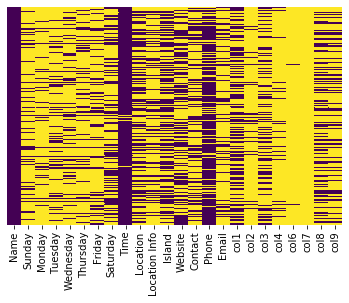

In [35]:
sns.heatmap(data.isna(), cmap='viridis', cbar=False, yticklabels=False)

There are many missing values in col4, col6, and col7. We can check and drop these columns if possible.

In [36]:
data.drop('col7',axis=1,inplace=True)

In [37]:
data[data['col6'].notna()]['col6'].unique()

array(['Email: ', 'Email:  '], dtype=object)

In [38]:
data.drop('col6',axis=1,inplace=True)

In [39]:
data[data['col4'].notna()]['col4'].unique()

array(['Email: ', 'Email:   ', ':  : ', ', : , Cell: ', 'Email:    ',
       'Agent Juanita Kawamoto, Farm Fresh Hawaii; ', ':  ', ': ',
       'PO Box 822, Hanalei, HI', ':  at '], dtype=object)

Only two useful data in col4. Let's see which rows they are.

In [40]:
data[(data['col4'] == 'Agent Juanita Kawamoto, Farm Fresh Hawaii; ') |
     (data['col4'] == 'PO Box 822, Hanalei, HI')]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,Location,Location Info,Island,Website,Contact,Phone,Email,col1,col2,col3,col4,col8,col9
93,Makiki Local Grown Farmers' Market at St. Clement's Church,NaN,NaN,NaN,NaN,X,NaN,NaN,4:30 PM to 7:30 PM,NaN,NaN,NaN,www.farmfreshhawaii.com,George Lee,(808) 735-4550,georgelee2468@gmail.com,1515 Wilder Avenue at Makiki St. (Parking on Wilder after 5:30 p.m.),NaN,: or,"Agent Juanita Kawamoto, Farm Fresh Hawaii;",NaN,NaN
152,Hanalei Saturday Market,NaN,NaN,NaN,NaN,NaN,NaN,X,9:00 AM to 1:30 PM,NaN,NaN,NaN,www.halehalawai.org/market.htm,Stephanie Struble,(808) 826-1011,NaN,Hanalei,NaN,",","PO Box 822, Hanalei, HI",NaN,NaN


I will move these value to col2 Info and drop col4.

In [41]:
data.loc[93]['col2'] = 'Agent Juanita Kawamoto, Farm Fresh Hawaii'
data.loc[152]['col2'] = 'PO Box 822, Hanalei, HI'
data.drop('col4',axis=1,inplace=True)

In [42]:
data[data['col3'].notna()]['col3'].unique()

array(['Edith Ramiscal', ', : ', ': : ', ': ', '.  ', ':  : ',
       ':  Cell: ', 'First Wednesdays', ':  email: ',
       'Pearl City, HI  96782', ',  ', ':   or ', ': , , ',
       '1st & 3rd Wednesdays', ':  or 692-8200 ext. 2267',
       'Matilda Adams at the site', ',   ', ': , , (Cell) ', 'Phone:',
       'Friday: 4:30 PM - 8:00 PM; Saturday: 9:00 AM - 2:00 PM', ':  ',
       ' at ; : ', '; : '], dtype=object)

In [43]:
data[(data['col3'] == 'Edith Ramiscal') |
     (data['col3'] == 'First Wednesdays') |
     (data['col3'] == 'Pearl City, HI  96782') |
     (data['col3'] == '1st & 3rd Wednesdays') |
     (data['col3'] == 'Matilda Adams at the site') |
     (data['col3'] == 'Friday: 4:30 PM - 8:00 PM; Saturday: 9:00 AM - 2:00 PM')]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,Location,Location Info,Island,Website,Contact,Phone,Email,col1,col2,col3,col8,col9
0,Waialua Farmers' Market,NaN,NaN,NaN,NaN,NaN,NaN,X,8:30 AM to 12:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,info@sugarmillhawaii.com,Waialua Sugar Mill,NaN,Edith Ramiscal,NaN,NaN
55,Queen's Medical Center,NaN,NaN,NaN,X,NaN,NaN,NaN,10:00 AM to 2:00 PM,NaN,1st Wed.,NaN,NaN,NaN,NaN,NaN,"1301 Punchbowl Street, Honolulu",NaN,First Wednesdays,NaN,NaN
59,Mahiku Farmers' Market,NaN,NaN,NaN,NaN,NaN,X,NaN,3:00 PM to 7:00 PM,NaN,NaN,NaN,NaN,Sonny Doung,(808) 225-4002,sonnydoung@hotmail.com,Momilani Community Center,715 Hoomoana St. (corner of Hoomoana & Komo Mai Dr.),"Pearl City, HI 96782",NaN,NaN
125,First Insurance Center,NaN,NaN,NaN,X,NaN,NaN,NaN,10:00 AM to 1:00 PM,NaN,1st & 3rd,NaN,NaN,NaN,NaN,NaN,"1100 Ward Ave., Honolulu (across from Thomas Square)",NaN,1st & 3rd Wednesdays,NaN,NaN
134,Kalaheo Neighborhood Center (Sunshine Markets),NaN,NaN,X,NaN,NaN,NaN,NaN,3:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Papalina Road off Kaumualii, Kalaheo",NaN,Matilda Adams at the site,NaN,NaN
206,Kaka'ako Makai Community Cultural Marketplace,NaN,NaN,NaN,NaN,NaN,X,X,"9:00 AM to 2:00 PM, 4:30 PM to 8:00 PM",NaN,NaN,NaN,www.KakaakoMakaiMarket.com,NaN,(808) 330-6224,NaN,one block makai of Ala Moana Blvd. & Ward Ave.,corner Ilalo & Ahui Sts.,Friday: 4:30 PM - 8:00 PM; Saturday: 9:00 AM - 2:00 PM,NaN,NaN


I will clean this column instead of dropping it.

In [44]:
data['col3'] = np.where((data['col3'] == 'Edith Ramiscal') |
                        (data['col3'] == 'First Wednesdays') |
                        (data['col3'] == 'Pearl City, HI  96782') |
                        (data['col3'] == '1st & 3rd Wednesdays') |
                        (data['col3'] == 'Matilda Adams at the site') |
                        (data['col3'] == 'Friday: 4:30 PM - 8:00 PM; Saturday: 9:00 AM - 2:00 PM'),
                        data['col3'], np.nan)

In [45]:
data[data['col3'].notna()]['col3'].unique()

array(['Edith Ramiscal', 'First Wednesdays', 'Pearl City, HI  96782',
       '1st & 3rd Wednesdays', 'Matilda Adams at the site',
       'Friday: 4:30 PM - 8:00 PM; Saturday: 9:00 AM - 2:00 PM'],
      dtype=object)

Let's see if we can move these data to other columns.

In [46]:
data[data['col3'].notna()][['col1','col2','col3']]

,col1,col2,col3
0,Waialua Sugar Mill,NaN,Edith Ramiscal
55,"1301 Punchbowl Street, Honolulu",NaN,First Wednesdays
59,Momilani Community Center,715 Hoomoana St. (corner of Hoomoana & Komo Mai Dr.),"Pearl City, HI 96782"
125,"1100 Ward Ave., Honolulu (across from Thomas Square)",NaN,1st & 3rd Wednesdays
134,"Papalina Road off Kaumualii, Kalaheo",NaN,Matilda Adams at the site
206,one block makai of Ala Moana Blvd. & Ward Ave.,corner Ilalo & Ahui Sts.,Friday: 4:30 PM - 8:00 PM; Saturday: 9:00 AM - 2:00 PM


I'll move location information in col3 to col2 and keep schedule information only in col3.

In [47]:
data.loc[0][['col2','col3']] = ['Edith Ramiscal',np.nan]
data.loc[59][['col2','col3']] = ['715 Hoomoana St. (corner of Hoomoana & Komo Mai Dr.) Pearl City, HI 96782',np.nan]
data.loc[134][['col2','col3']] = ['Matilda Adams at the site',np.nan]

In [48]:
data.replace('^\s*$', np.nan, regex=True, inplace = True)

Check col2.

In [49]:
data[data['col2'].notna()]['col2']

0      Edith Ramiscal                                                           
20     :  :                                                                     
23     Makapua Center - In front of K-Mart, Kailua-Kona                         
46     Kamakee St.                                                              
51     Poipu, HI                                                                
54     Behind Paniolo Country Inn                                               
59     715 Hoomoana St. (corner of Hoomoana & Komo Mai Dr.) Pearl City, HI 96782
77     84-4770 Mamalahoa Hwy, Captain Cook                                      
79     Kaahumanu Avenue, Kahului                                                
93     Agent Juanita Kawamoto, Farm Fresh Hawaii                                
109    68-3625 Paniolo Ave., Waikoloa                                           
110    Every Wednesday                                                          
113    Noon                 

In [50]:
data.loc[20]['col2'] = np.nan
data['col2'] = data['col2'].str.strip(' ')

## Clean up col8 and col9

In [51]:
data['col8'].unique()

array([nan, 'Honolulu, HI', '(21.978857825000432, -159.36718896099975)',
       'Kaneohe, HI', 'Ewa Beach, HI', 'Pearl City, HI 96782',
       'Mililani, HI', 'Makawao, HI 96768', 'Paia, HI 96799',
       '(19.496937200000446, -155.92166908399975)', 'Kailua, HI',
       '(21.334220008000443, -158.08191927499973)',
       '(21.304850435000446, -157.85774940299973)', 'Honolulu, HI 96814',
       '(21.58948073400046, -158.10290913599974)', 'Waipahu, HI',
       'Lahina, HI 96761', 'Kahului, HI 96732', 'Kihei, HI 96753',
       'Honolulu, HI 96822', '(21.396571048000453, -157.74006959799974)',
       '(19.690021148000426, -155.06952407299974)', 'Waianae, HI',
       'Hana, HI 96713', 'Lihue', 'Kapolei, HI',
       '(21.393800202000477, -157.96977976199975)', 'Kailua-Kona',
       '(19.49469006600043, -154.94809898999975)',
       '(22.201686187000462, -159.50311687099975)',
       'Kihei, HI 96753-8801', 'Honolulu, HI 96825',
       'Cooper Center, Volcano', 'Kaunakakai, HI 96748', 'Waikol

This column has city information as well as the coordinate information

In [52]:
data['col9'].unique()

array([nan, '(21.307250002000444, -157.85527925099973)',
       '(21.277500376000432, -157.82711977399973)',
       '(21.293791309000426, -157.82719811599975)',
       '(21.409360657000434, -157.81028953799975)',
       '(21.31503419100045, -158.01439823499973)',
       '(21.408970034000447, -157.96024986999973)',
       '(21.452906795000445, -158.00846980399973)',
       '(21.413500808000435, -157.79883930699975)',
       '(21.335250464000467, -157.86880934999974)',
       '(20.849390600000447, -156.30839892799975)',
       '(20.906238207000456, -156.37416925199975)',
       '(21.39584092800044, -157.73751944899973)',
       '(21.307830753000474, -157.86242916299975)',
       '(21.30376089200047, -157.83456927999973)',
       '(21.28928015800045, -157.84219969299974)',
       '(21.302690421000477, -157.85208973299973)',
       '(21.29999544000043, -157.85177574799974)',
       '(21.30367101400043, -157.83730940699974)',
       '(21.40006058600045, -158.00463924399975)',
       '(20.82

This one has coordinate only. I'll move coordinate from col8 to col9

In [53]:
data['col9'] = np.where(data['col9'].isna() &
                        data['col8'].str.contains('\(\d+\.\d+\, \-\d+\d.\d+\)',na=False),
                        data['col8'].str.findall('\(\d+\.\d+\, \-\d+\d.\d+\)').str[0],
                        data['col9'])
data['col8'] = np.where(data['col8'].str.contains('\(\d+\.\d+\, \-\d+\d.\d+\)',na=False),
                        np.nan, data['col8'])

In [54]:
#Export csv file
data.to_csv('01out', index=False)